In [4]:
def read_file_text(filename, encoding='utf-8'):
    text = ''
    with open(filename, 'r', encoding=encoding) as f:
        try:
            text = f.read()
        except UnicodeDecodeError:
            logger.warning('Can\'t read file {0}. Bad encoding.'
                           .format(filename))
    return text

In [5]:
text = read_file_text('../datasets/bbc/cricket/012.txt')

In [6]:
text

'Tudor given fresh start by Essex\n\nFormer England paceman Alex Tudor has joined Essex on a one-year contract.\n\nThe 27-year-old, who 10 Test caps, was released by Surrey at the end of last season after 10 years at The Oval. He only played one Championship game in 2004 because of a side injury and has agreed \'performance related\' terms with Essex after treatment by a specialist. "I am determined to repay Essex for the faith they have shown in me. This is a new start for me and I am just itching to get out on the field," he said. "[Essex captain] Ronnie Irani phoned me up after he heard I\'d been released by Surrey and said he wanted to get me fit. Even if I didn\'t sign he just wanted to get me back on the cricket field. "I\'ve had a spinal problem and Essex put me in touch with some people in Germany and I owe them a lot," he added. Tudor is also a useful performer with the bat and became an overnight hero in 1999 when his innings of 99 not out against New Zealand saw England to a

In [7]:
from itertools import combinations
from nltk.tokenize import sent_tokenize, RegexpTokenizer
from nltk.stem.snowball import RussianStemmer, EnglishStemmer
import networkx as nx
import matplotlib.pyplot as plt

### similarity
\begin{equation}
\frac{|sentence1 \cap sentence2|}{|sentence1 \cup sentence2|}
\end{equation}

There are many problems of this method:
- Ignoring key words (with more weight). But how to know these key words?
- Ignoring "junk" words (with less weight)
- If all sentences are not similare at all
- Words do not represent the point of text?

I started using good instruments

show the best of each method

Analyze result with evidences

Use method ROUGE for сравнение

In [8]:
def similarity(s1, s2):
    if not len(s1) or not len(s2):
        return 0.0
    return len(s1.intersection(s2)) / (1.0 * (len(s1) + len(s2)))

In [9]:
def textrank(text):
    """
    Returns
    list of sorted tuples by pagerank for sentences
    [(number_of_sentence, pagerank, sentence), ...]
    """
    sentences = sent_tokenize(text)
    for i, s in enumerate(sentences):
        lines = s.splitlines()
        [lines.pop(j) for j, l in enumerate(lines) if len(l) < 1]
        sentences.pop(i)
        sentences.extend(lines)

    tokenizer = RegexpTokenizer(r'\w+')
    # lmtzr = RussianStemmer()
    lmtzr = EnglishStemmer()
    # tokenize words and find unique stems for them
    stem_words_for_sentence = [set(lmtzr.stem(word)
                                   for word in tokenizer.tokenize(sentence.lower()))
                               for sentence in sentences]
    print(stem_words_for_sentence)
    
    pair_sentences = combinations(range(len(sentences)), 2)
    scores = [(i, j, similarity(stem_words_for_sentence[i], stem_words_for_sentence[j]))
              for i, j in pair_sentences]
    print(scores)
    # filter scores with existing similarity
    scores = filter(lambda x: x[2], scores)
    
    g = nx.Graph()
    # graph (u,v,w) - (sentence1 idx, sentence2 idx, similarity)
    g.add_weighted_edges_from(scores)
    pr = nx.pagerank(g)
    print()
    print(pr)
    
    my_sorted = sorted(((i, pr[i], s) for i, s in enumerate(sentences) if i in pr),
                       key=lambda x: pr[x[0]],
                       reverse=True)

    return my_sorted, g

def extract(text, n=5):
    tr = textrank(text)
    top_n = sorted(tr[:n])
    return ' '.join(x[2] for x in top_n)

In [10]:
s, g = textrank(text)

[{'after', 'end', '27', 'releas', 'by', 'old', 'year', 'who', 'test', 'surrey', 'was', 'at', 'cap', '10', 'the', 'of', 'season', 'last', 'oval'}, {'in', 'faith', 'am', 'me', 'essex', 'determin', 'have', 'for', 'they', 'the', 'to', 'repay', 'i', 'shown'}, {'surrey', 'irani', 'd', 'essex', 'said', 'phone', 'after', 'captain', 'get', 'me', 'been', 'by', 'and', 'ronni', 'to', 'fit', 'i', 'want', 'releas', 'heard', 'he', 'up'}, {'some', 'lot', 'peopl', 'them', 'me', 'spinal', 'essex', 'germani', 'and', 'a', 'i', 'put', 'owe', 'ad', 'problem', 'in', 'touch', 've', 'with', 'he', 'had'}, {'ash', 'on', 'the', 'mate', 'play', 'tour', 'england', 'iron', 'essex', 'team', 'squad', 'new', 'last', '03', 'as', 'a', 'replac', '2002', 'join', 'gough', 'for', 'when', 'darren', 'he'}, {'profession', 's', 'the', 'asset', 'who', 'team', 'is', 'class', 'he', 'be', 'a', 'great', 'to', 'will', 'with', 'model', 'websit', 'first', 'told', 'club', 'attitud', 'role'}, {'goe', 'we', 'the', 'an', 'england', 'essex',

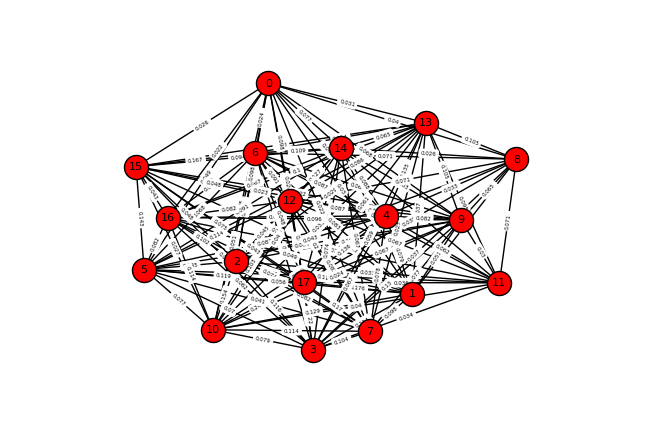

In [11]:
# pos=nx.get_node_attributes(g, 'pos')
pos=nx.spring_layout(g, scale=20)
nx.draw(g, pos)
w_labels = nx.get_edge_attributes(g, 'weight')
w_labels = dict((node, round(weight, 3)) for node, weight in w_labels.items())
# print(w_labels)
# get_node_attributes
nx.draw_networkx_labels(g, pos, font_size=8)
nx.draw_networkx_edge_labels(g, pos, edge_labels=w_labels, font_size=4)
plt.show()

In [12]:
s

[(17,
  0.08133939949848581,
  'This is a new start for me and I am just itching to get out on the field," he said.'),
 (2,
  0.06294117777966102,
  '"[Essex captain] Ronnie Irani phoned me up after he heard I\'d been released by Surrey and said he wanted to get me fit.'),
 (12,
  0.0628184434718523,
  "The signing was also welcomed by coach Graham Gooch, who was England manager on Tudor's first tour to Australia in 1998-99."),
 (6,
  0.062171117146113744,
  '"If all goes well then hopefully we will be talking about Alex Tudor in the future as an Essex and England player."'),
 (14,
  0.06205301877045071,
  'Tudor is also a useful performer with the bat and became an overnight hero in 1999 when his innings of 99 not out against New Zealand saw England to a Test victory at Edgbaston.'),
 (10,
  0.061967464696479846,
  "Even if I didn't sign he just wanted to get me back on the cricket field."),
 (4,
  0.06012537782204623,
  'He last played for England on the 2002-03 Ashes tour when, iron